/var/folders/v9/0cr7_35s4q7f7g0306ks9xvm0000gn/T/ipykernel_58174/2497272208.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/v9/0cr7_35s4q7f7g0306ks9xvm0000gn/T/ipykernel_58174/2497272208.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_all_projects = pd.read_sql(query_all_projects, conn)


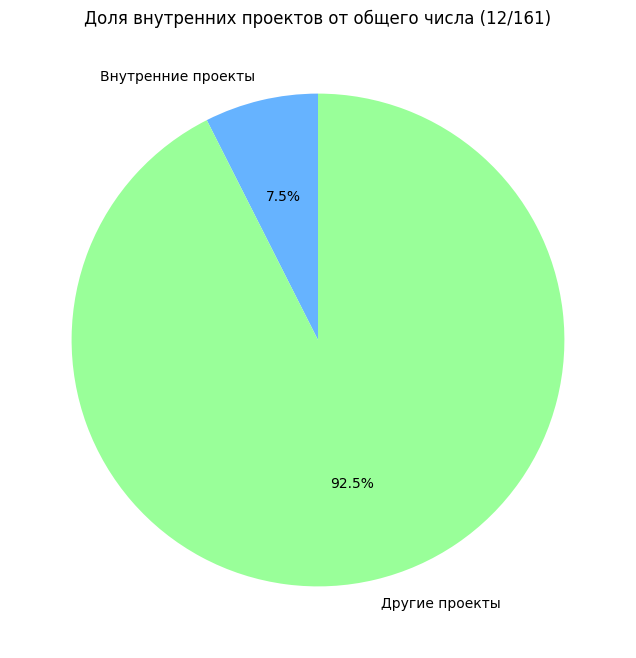

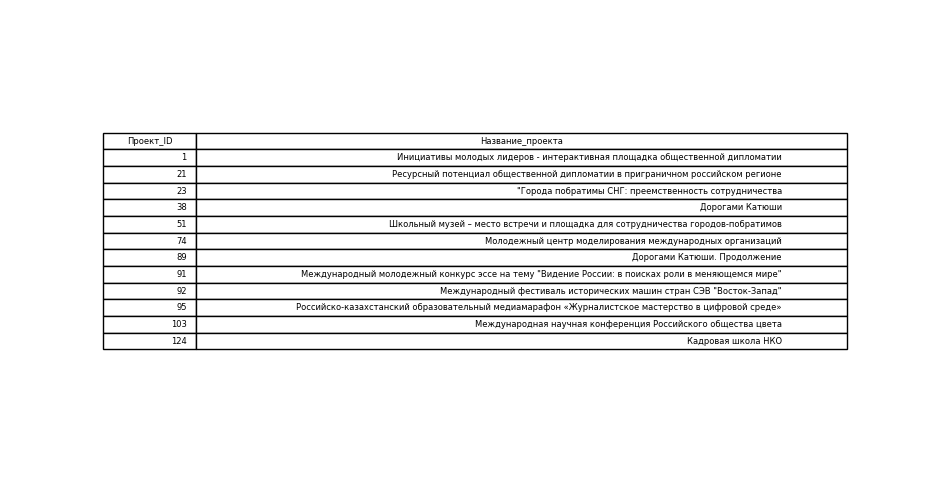

In [3]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Подключение к базе данных
db_config = {
    'host': 'localhost',
    'database': 'projectsdb',
    'user': 'root',
    'password': 'NewStrongPassword'
}

# Путь к SQL-запросу 8 (внутренние проекты)
query_file = "../sql_queries/8_internal_projects_ranking.sql"

# Функция выполнения SQL-запроса
def execute_query(query_file):
    with open(query_file, 'r', encoding='utf-8') as file:
        query = file.read()

    conn = mysql.connector.connect(**db_config)
    df = pd.read_sql(query, conn)
    conn.close()
    
    return df

# 🟢 Выполнение запроса для получения внутренних проектов
df_internal = execute_query(query_file)

# Получаем общее количество всех проектов
query_all_projects = """
SELECT COUNT(*) AS total_projects
FROM Проект;
"""

# Получаем данные о всех проектах
conn = mysql.connector.connect(**db_config)
df_all_projects = pd.read_sql(query_all_projects, conn)
conn.close()

# Общее количество проектов
total_projects = df_all_projects['total_projects'][0]

# Подсчитываем количество внутренних проектов
internal_projects_count = df_internal.shape[0]

# Подготовим данные для круговой диаграммы
sizes = [internal_projects_count, total_projects - internal_projects_count]
labels = ['Внутренние проекты', 'Другие проекты']

# Строим круговую диаграмму
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title(f'Доля внутренних проектов от общего числа ({internal_projects_count}/{total_projects})')

# Добавляем таблицу с названиями внутренних проектов
plt.figure(figsize=(12, 6))
plt.axis('tight')
plt.axis('off')

# Выводим таблицу
table_data = df_internal[['Проект_ID', 'Название_проекта']]

# Строим таблицу с полными названиями проектов
plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='center', colWidths=[0.1, 0.7])

# Показываем график и таблицу
plt.show()
